# Analysis on Personal Spending

### Import bank transactions
### Extrapolate into the future

notes: 
Opting to split between loan and transaction accounts believe the latter can be analysed to best analyse spending


Show spending trends by category
Identify spending trends - ie patterns etc
Monitor categories for changes - ie increase month on month

What question would I like to answer

Where are we spending our money?
What categories?
Is our expenditure increasing/decreasing over time?
Are there any spending patterns/behaviours that are of concern?  (e.g. we spend more on takeout close to payday (not ideal))

In [160]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
#issues with two files (credit card + savingss) having values containing commas, breaking out the value to multiple columns and causing errors
#manually opening the CSV files and correctin - would be to automate the correctin of these catw
#ideally I'd export in a different format, or rpelace the commas before epxortin  but neither are possible in this case
#added a line to test github branching

#folder containing one or more csv file to import
inputfolder = 'C:\\Users\\mcleodb\\Documents\\SpendFiles 20210405\\'
os.chdir(inputfolder)
files = os.listdir()
templist = []
#import each file to temp dataframe and append to the main one - adding column to capture the source
for i in files:
    loc = inputfolder + i
    print('import file: ',loc)
    tempdf = pd.read_csv(loc)
    tempdf['sourcefile'] = i
    templist.append(tempdf)
    dfraw = pd.concat(templist)

import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\creditcard trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\export.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\loan fixed trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\loan variable trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\savings trans050421.csv


In [278]:
df_spend.head()

,Description,Debit,Credit,amount,Category,SubCategory,sourcefile,charge
date,,,,,,,,
2021-03-11,Visa Purchase 09Mar Spotify P1...,11.99,NaN,-11.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-03-06,Visa Purchase 04Mar Netflix Co...,15.99,NaN,-15.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-02-11,Visa Purchase 09Feb Spotify P1...,11.99,NaN,-11.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-02-05,Visa Purchase 03Feb Netflix.Co...,15.99,NaN,-15.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-01-12,Visa Purchase 09Jan Spotify P1...,11.99,NaN,-11.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit


In [183]:
#data cleaning - formatting dates, and consolidating debit/credit to single column


#convert debits to neg amount and add as separate column
# dfraw['Debit_neg'] = dfraw['Debit'] * -1
#OR keep debits as positive amount and add as separate column
dfraw['Debit_neg'] = dfraw['Debit'] * -1


dfraw['amount'] = dfraw[['Debit_neg','Credit']].sum(axis=1)

df_all = dfraw[['Description','Debit','Credit', 'amount', 'Category',
       'SubCategory', 'sourcefile']].copy() 
df_all['date'] = pd.to_datetime(dfraw['Date'],format=r'%Y%m%d')

#I like the idea of having a column to denote if charge is a debit or credit
df_all['charge'] = df_all.amount.apply(lambda x: 'debit' if x <= 0 else 'credit')

#filter after 1/5/20 to exclude some initial loan transfers which are not meaningful for this analysis
df_all = df_all[df_all['date'] >= '2020-05-01']
df_all.to_csv('export.csv')

#create a subset which excludes the loan accounts
df_spend = df_all[df_all['sourcefile'].str.match('sav')]
df_spend = df_spend.append(df_all[df_all['sourcefile'].str.match('credit')])
#on this spend subset - make the date the index (so we can resample / agg by date)
df_spend.set_index('date', inplace=True)    


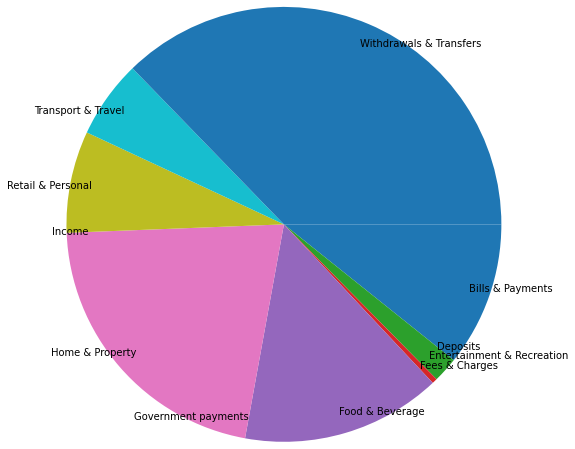

In [260]:
#TODO
#PLOT OUTGOING SPEND BY CATEGORY
x = df_spend.groupby('Category').Debit.sum()
y = x.index
plt.pie(x, radius = 2.5, labels = y, labeldistance=.9, counterclock=False)
plt.show()

#PLOT OUTGOING SPEND BY CATEGORY MONTHLY

In [291]:
#create a pivot table - I don't know why...
table = pd.pivot_table(df_spend, index = ['Category','SubCategory'], columns='charge', values='Debit')
table

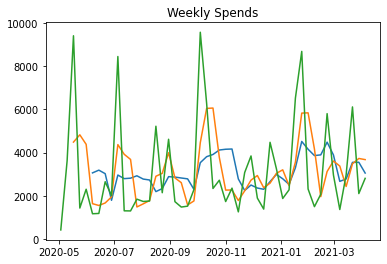

In [373]:
fig = plt.figure()
ax = plt.subplot(111)

a1 = df_spend.Debit.resample('W').sum().rolling(window=6).mean()
ax.plot(a1,label='SMA_6')
a2 = df_spend.Debit.resample('W').sum().rolling(window=3).mean()
ax.plot(a2, label='SMA_3')
a3 = df_spend.Debit.resample('W').sum()
ax.plot(a3, label='Weekly Spend')

plt.title('Weekly Spends')

plt.show()

In [359]:

s

date
2020-05-03            NaN
2020-05-10            NaN
2020-05-17            NaN
2020-05-24            NaN
2020-05-31            NaN
2020-06-07    3064.038333
2020-06-14    3191.028333
2020-06-21    3028.105000
2020-06-28    1796.046667
2020-07-05    2964.398333
2020-07-12    2798.056667
2020-07-19    2819.761667
2020-07-26    2929.940000
2020-08-02    2777.803333
2020-08-09    2735.416667
2020-08-16    2197.946667
2020-08-23    2337.473333
2020-08-30    2889.991667
2020-09-06    2870.748333
2020-09-13    2827.631667
2020-09-20    2788.158333
2020-09-27    2299.833333
2020-10-04    3537.301667
2020-10-11    3813.848333
2020-10-18    3915.375000
2020-10-25    4122.198333
2020-11-01    4157.678333
2020-11-08    4168.658333
2020-11-15    2783.561667
2020-11-22    2250.648333
2020-11-29    2501.591667
2020-12-06    2363.870000
2020-12-13    2305.800000
2020-12-20    2659.075000
2020-12-27    2992.305000
2021-01-03    2792.105000
2021-01-10    2530.816667
2021-01-17    3301.943333
2021-01